In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel("../data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Subplots

Plot The distribution of lodging revenue for our top 5 countries by revenue ("PRT, "ESP", "FRA", "DEU", "GBR").

**Limit Data to Bookings with RoomNights < 15**

Make sure to share both x and y axes and give them titles!

Remove the extra chart with `ax[row, col].set_axis_off()` if using plt.subplots()


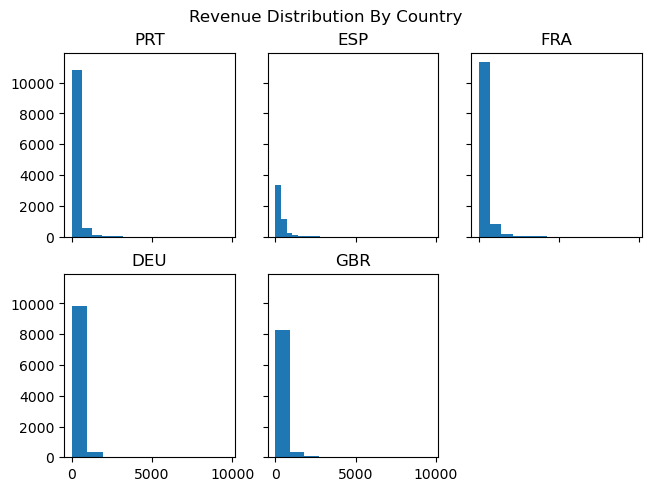

In [3]:
# first solution, using subplots, contrained_layout tomake sure no overlap of axes
fig,ax= plt.subplots(2,3, constrained_layout = True, sharex='all', sharey='all')

# Add figure level title
fig.suptitle("Revenue Distribution By Country")

# using ".query" to filter the DataFrame by specific Nationality and RoomNights < 15, 
# before ploting LodgingRevenue column
ax[0][0].hist(hotels
             .query("Nationality == 'PRT' and RoomNights < 15").loc[:, "LodgingRevenue"])
#setting title to Nation
ax[0][0].set_title("PRT")
ax[0][1].hist(hotels
             .query("Nationality == 'ESP' and RoomNights < 15").loc[:, "LodgingRevenue"])
ax[0][1].set_title("ESP")
ax[0][2].hist(hotels
             .query("Nationality == 'FRA' and RoomNights < 15").loc[:, "LodgingRevenue"])
ax[0][2].set_title("FRA")
ax[1][0].hist(hotels
             .query("Nationality == 'DEU' and RoomNights < 15").loc[:, "LodgingRevenue"])
ax[1][0].set_title("DEU")
ax[1][1].hist(hotels
             .query("Nationality == 'GBR' and RoomNights < 15").loc[:, "LodgingRevenue"])
ax[1][1].set_title("GBR")

# Turn off axiss on third chart on seond row
ax[1,2].set_axis_off()


C:\Users\kyobu\AppData\Local\Temp\ipykernel_20056\1850696482.py:33: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
C:\Users\kyobu\AppData\Local\Temp\ipykernel_20056\1850696482.py:34: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list);


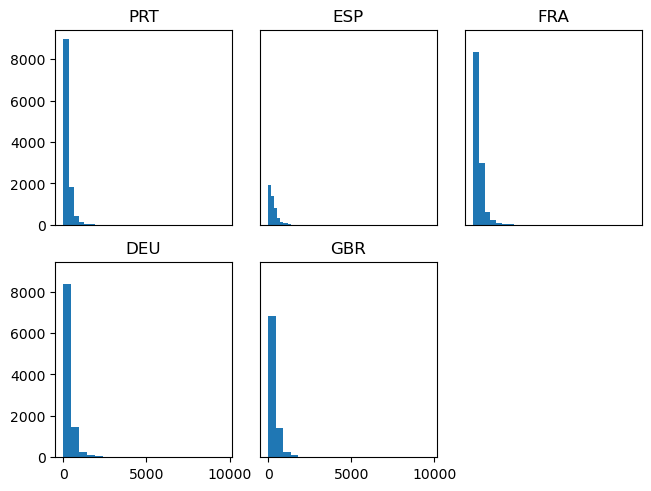

In [4]:
#Second solution, using iterating
country_list = ["PRT", "ESP", "FRA", "DEU", "GBR"]

# empty list to append to
ax_list = []

# Specifynumber of rows and columns
nrows, ncols = (2,3)

# build a figure to add subplots to
fig = plt.figure(constrained_layout=True)


for i, country in enumerate(country_list): # enumerate
    ax = fig.add_subplot(nrows, ncols, i + 1) # build each chart then add one each iteration
    ax.hist(
        (hotels
         .query(f"Nationality == '{country}' & RoomNights < 15") # using "f" string to pull in 'country' each iteration
         .loc[ :, "LodgingRevenue"]),
        bins=20,
    )

    ax.set_title(f"{country}") # set the title based on the country
    ax_list.append(ax) # appening to 

    if i % ncols != 0: # set ticks to be blank for anything that doesn't start a row
        ax.set_yticks([])
    
    if (i / ncols) < nrows - 1 : # set x ticks to be clank for anything that isn't in the last row
        ax.set_xticks([])
        
# helper method to share x and y axes        
ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list);

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

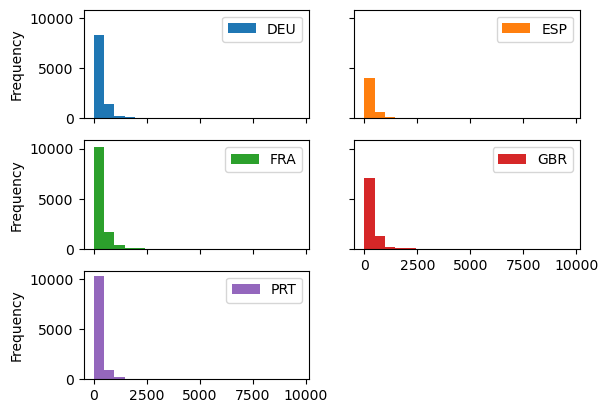

In [5]:
#3rd option, 
#turn dataframe into pivot
hotel_pivot = (
    hotels
    .query("Nationality in @country_list and RoomNights < 15") # Filter the df
    .pivot_table(
        index="ID", #index to ID
        columns="Nationality", # columns to Nationality
        values="LodgingRevenue" # values to revenue
    )
)

# Pandas Plot API
hotel_pivot.plot.hist(subplots=True,
                      bins=20,
                      layout=(3, 2),
                      sharex=True,
                      sharey=True)

# Assignment 2: GridSpec

* Build a Gridspec layout with a line chart plotting Lodging Revenue Vs. Hotel Revenue for all countries at the top of your report.

* Build a bar chart of total revenue (Lodging + Other Revenue) by country for our top 5 countries

* Build a Donut Chart Specifying 67% of the way to our Goal of French Revenue for the year

In [6]:
hotels = hotels.assign(
    date = pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"),
    total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"]
)

# Prep Data For Line Chart
daily_revenue = hotels.groupby("date").agg({"LodgingRevenue": "sum", "OtherRevenue": "sum", "total_revenue": "sum"})

monthly_revenue = daily_revenue.resample("M").sum()

monthly_revenue.head()

,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [7]:
# Prep Data For Bar Chart
countries = (hotels
    .groupby("Nationality")
    .agg({"total_revenue": "sum"})
    .sort_values("total_revenue", ascending= False)
    .iloc[:5]
)
countries

,total_revenue
Nationality,
FRA,4842481.89
DEU,3838924.08
PRT,3380643.30
GBR,3284336.38
ESP,1795750.15


Text(0.5, 1.0, 'Percent of 2018 French Revenue Goal Met')

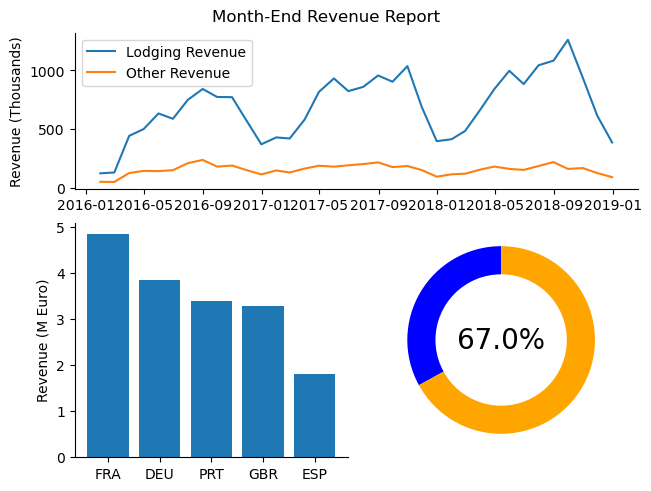

In [8]:
# Build GridSpec (where I finished, missed the fig area)
from matplotlib.gridspec import GridSpec
# set the figure
fig = plt.figure(constrained_layout = True)

#main title
fig.suptitle("Month-End Revenue Report")

#set up the grid
grid = GridSpec(10,10, figure=fig)

# first chart
ax1 = fig.add_subplot(grid[:4, :10])
ax1.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/ 1000,
        label="Lodging Revenue"
        )
ax1.plot(monthly_revenue.index,
        monthly_revenue["OtherRevenue"]/ 1000,
        label="Other Revenue"
        )
#removing spines
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.legend()

ax1.set_ylabel("Revenue (Thousands)")



#second chart
ax2 = fig.add_subplot(grid[4:10, 0:5])
ax2.bar(countries.index,
            countries["total_revenue"]/1000000)

ax2.set_ylabel("Revenue (M Euro)")

#removing spines
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

# third chart
ax3 = fig.add_subplot(grid[4:10, 5:10])
ax3.pie([.33,.67],
      startangle=90,
      labels=["",""],
#       autopct="%.0f%%",
#       pctdistance=.85,
      colors=["blue","orange"]
)

# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

# to add center text
plt.text(0,
        0,
        "67.0%",
        ha="center",
        va="center",
        fontsize=20
)

ax.set_title("Percent of 2018 French Revenue Goal Met", fontsize=12)


Text(0.5, 1.0, 'Percent of 2018 French Revenue Goal Met')

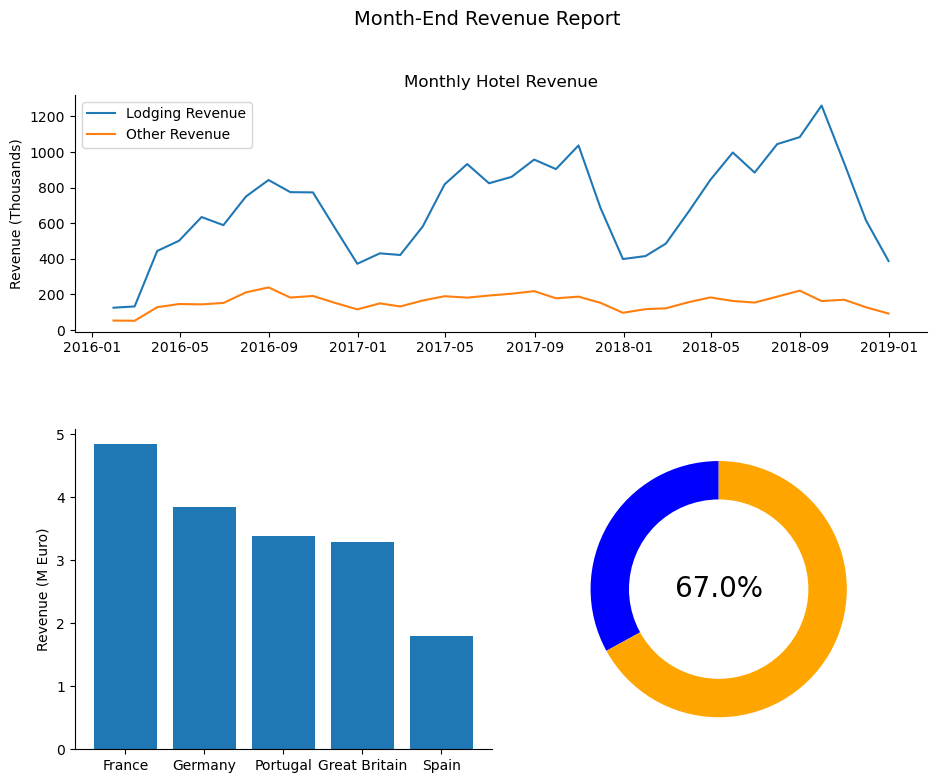

In [9]:
# Round 2
from matplotlib.gridspec import GridSpec
# set the figure
fig = plt.figure(figsize=(11, 8.5))

#main title
fig.suptitle("Month-End Revenue Report", fontsize=14)

#set up the grid
grid = GridSpec(8,8, figure=fig)

# first chart
ax1 = fig.add_subplot(grid[:3, :])
ax1.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/ 1000,
        label="Lodging Revenue"
        )
ax1.plot(monthly_revenue.index,
        monthly_revenue["OtherRevenue"]/ 1000,
        label="Other Revenue"
        )
#removing spines
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.legend()

ax1.set_ylabel("Revenue (Thousands)")

ax1.set_title("Monthly Hotel Revenue")

#second chart
ax2 = fig.add_subplot(grid[4:, :4])
ax2.bar(countries.index,
            countries["total_revenue"]/1000000)

ax2.set_ylabel("Revenue (M Euro)")

# to rename x tick labels
ax2.set_xticks(range(len(countries.index)))
ax2.set_xticklabels(["France", "Germany","Portugal", "Great Britain", "Spain"])

#removing spines
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

# third chart
ax3 = fig.add_subplot(grid[4:, 4:])
ax3.pie([.33,.67],
      startangle=90,
      labels=["",""],
#       autopct="%.0f%%",
#       pctdistance=.85,
      colors=["blue","orange"]
)

# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

# to add center text
plt.text(0,
        0,
        "67.0%",
        ha="center",
        va="center",
        fontsize=20
)

ax3.set_title("Percent of 2018 French Revenue Goal Met", fontsize=12)

# Assignment 3: Colors

* Apply the Set2 Colormap to the line chart.
* Look up the national colors of our top 5 countries and color each bar in the bar chart accordingly. The hex codes for colors can be looked up at https://flagcolor.com/.
* Finally, make the donut chart French Blue, and white out the secondary slice.

Text(0.5, 1.0, 'Percent of 2018 French Revenue Goal Met')

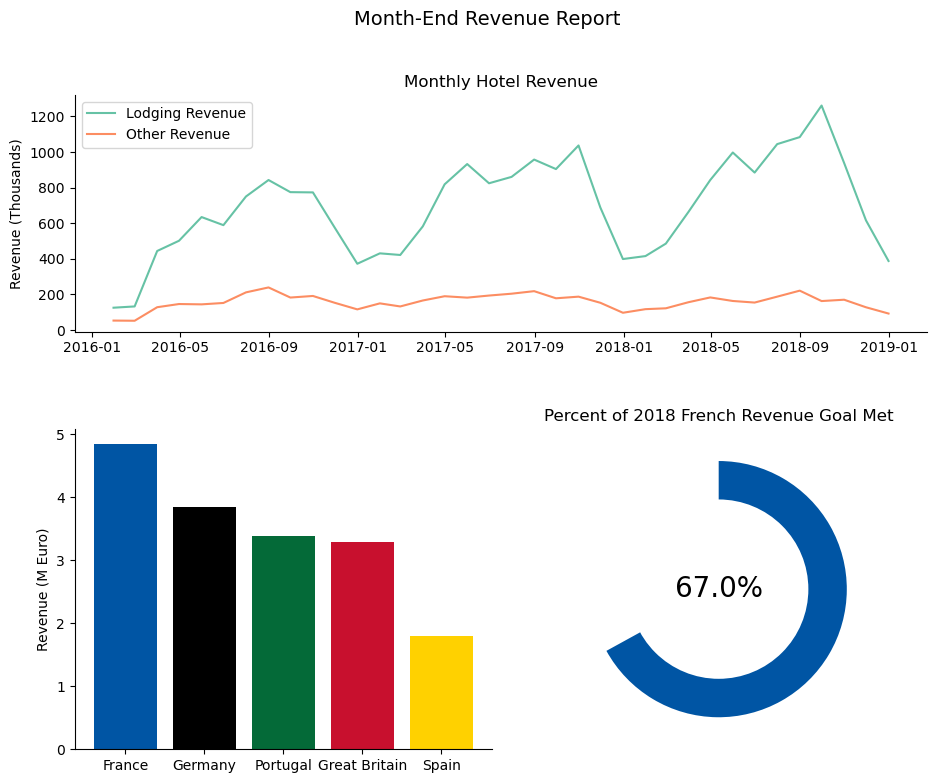

In [15]:
from matplotlib.gridspec import GridSpec
# set the figure
fig = plt.figure(figsize=(11, 8.5))

#main title
fig.suptitle("Month-End Revenue Report", fontsize=14)

#set up the grid
grid = GridSpec(8,8, figure=fig)

# set colormap
plt.rcParams["axes.prop_cycle"]= plt.cycler("color", plt.cm.Set2.colors)

#set colors for nations
colors= ["#0055A4", "black", "#046A38", "#C8102E", "#FFD100"]

# first chart
ax1 = fig.add_subplot(grid[:3, :])
ax1.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/ 1000,
        label="Lodging Revenue"
        )
ax1.plot(monthly_revenue.index,
        monthly_revenue["OtherRevenue"]/ 1000,
        label="Other Revenue"
        )
#removing spines
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.legend()

ax1.set_ylabel("Revenue (Thousands)")

ax1.set_title("Monthly Hotel Revenue")

#second chart
ax2 = fig.add_subplot(grid[4:, :4])
ax2.bar(countries.index,
            countries["total_revenue"]/1000000,
       color=colors)

ax2.set_ylabel("Revenue (M Euro)")

# to rename x tick labels
ax2.set_xticks(range(len(countries.index)))
ax2.set_xticklabels(["France", "Germany","Portugal", "Great Britain", "Spain"])

#removing spines
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

# third chart
ax3 = fig.add_subplot(grid[4:, 4:])
ax3.pie([.33,.67],
      startangle=90,
      labels=["",""],
#       autopct="%.0f%%",
#       pctdistance=.85,
      colors=["white","#0055A4"]
)

# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

# to add center text
plt.text(0,
        0,
        "67.0%",
        ha="center",
        va="center",
        fontsize=20
)

ax3.set_title("Percent of 2018 French Revenue Goal Met", fontsize=12)

# Assignment 4: Stylesheets
* Apply a stylesheet to the above code

Text(0.5, 1.0, 'Percent of 2018 French Revenue Goal Met')

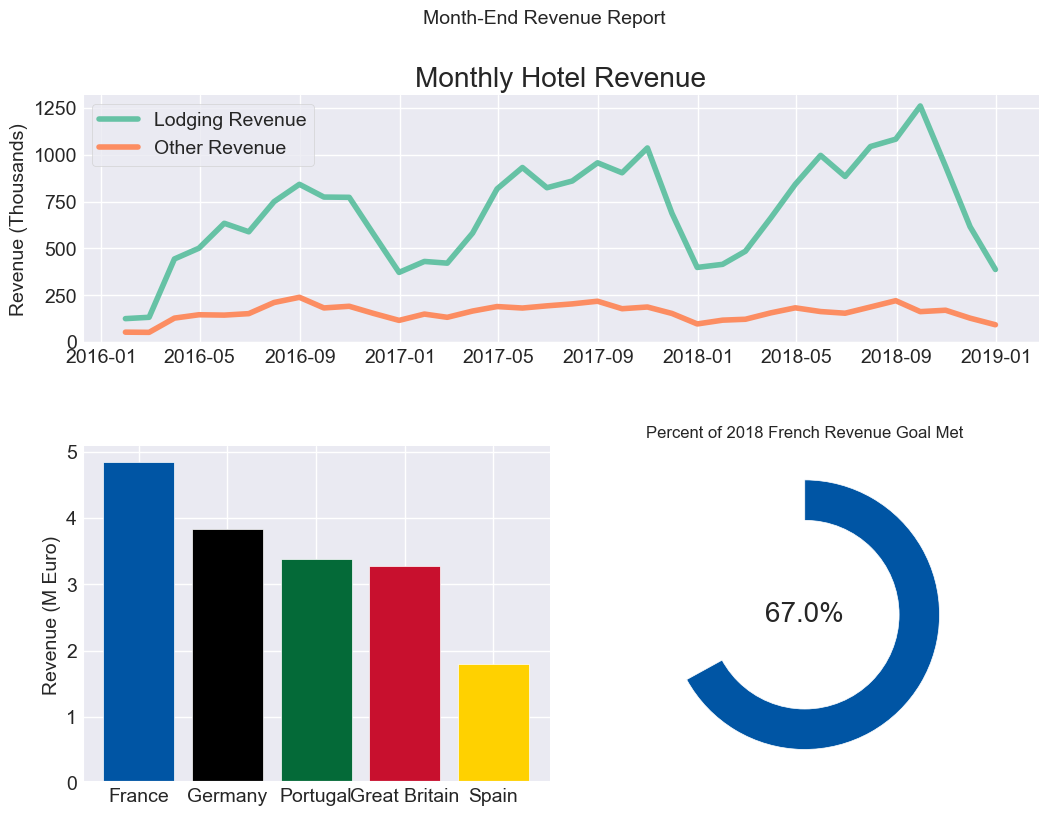

In [17]:
from matplotlib.gridspec import GridSpec
#set style sheet (will work on all once set)
#plt.style.use("fivethirtyeight") matplotlib oneset colors around the pie as well
import seaborn as sns
sns.set_style("darkgrid")

# set the figure
fig = plt.figure(figsize=(11, 8.5))

#main title
fig.suptitle("Month-End Revenue Report", fontsize=14)

#set up the grid
grid = GridSpec(8,8, figure=fig)

# set colormap
plt.rcParams["axes.prop_cycle"]= plt.cycler("color", plt.cm.Set2.colors)

#set colors for nations
colors= ["#0055A4", "black", "#046A38", "#C8102E", "#FFD100"]

# first chart
ax1 = fig.add_subplot(grid[:3, :])
ax1.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"]/ 1000,
        label="Lodging Revenue"
        )
ax1.plot(monthly_revenue.index,
        monthly_revenue["OtherRevenue"]/ 1000,
        label="Other Revenue"
        )
#removing spines
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

ax1.legend()

ax1.set_ylabel("Revenue (Thousands)")

ax1.set_title("Monthly Hotel Revenue")

#second chart
ax2 = fig.add_subplot(grid[4:, :4])
ax2.bar(countries.index,
            countries["total_revenue"]/1000000,
       color=colors)

ax2.set_ylabel("Revenue (M Euro)")

# to rename x tick labels
ax2.set_xticks(range(len(countries.index)))
ax2.set_xticklabels(["France", "Germany","Portugal", "Great Britain", "Spain"])

#removing spines
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

# third chart
ax3 = fig.add_subplot(grid[4:, 4:])
ax3.pie([.33,.67],
      startangle=90,
      labels=["",""],
#       autopct="%.0f%%",
#       pctdistance=.85,
      colors=["white","#0055A4"]
)

# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

# to add center text
plt.text(0,
        0,
        "67.0%",
        ha="center",
        va="center",
        fontsize=20
)

ax3.set_title("Percent of 2018 French Revenue Goal Met", fontsize=12)